In [25]:
import pandas as pd 
import numpy as np
# Datei laden
#df_full = pd.read_pickle(r"/home/paul/Documents/atm/Bachelor-Arbeit-master/ground_state_180724_combined.pkl")
#df_full = pd.read_pickle(r"/home/paul/Documents/atm/Bachelor-Arbeit-master/ground_state_results_Omega_2207_deltas_zero_combined.pkl")
df_full = pd.read_pickle(r"/home/paul/Documents/atm/Bachelor-Arbeit-master/daten/ground_state_results_Omega_2207_deltas_negative_combined.pkl")


#df_full = pd.read_pickle(r"/home/paul/Documents/atm/Bachelor-Arbeit-master/daten/ground_state_results_Omega_2407_deltas_negative_combined.pkl")

#df_full = pd.read_pickle(r"/home/paul/Documents/atm/Bachelor-Arbeit-master/ground_state_deltas_one_0808.pkl")

# Wähle die zu plottenden Datenpunkte aus und filtere V > 0
df_filtered = df_full[df_full['V'] < 9]
#df_filtered = df_full[df_full['V'] < 0]
psi_00_all = df_filtered['<0|0>'].to_numpy()
psi_11_all = df_filtered['<1|1>'].to_numpy()
psi_22_all = df_filtered['<2|2>'].to_numpy()
purity = df_filtered['purity'].to_numpy()
values = df_filtered['additional params'].to_numpy()
variances = df_filtered[['var_<0|0>', 'var_<1|1>', 'var_<2|2>']].to_numpy()

# Extrahiere alle Parameter aus den 'additional params'
kappa = np.array([params[0] for params in values])
gamma = np.array([params[1] for params in values])
Gamma = np.array([params[2] for params in values])
Omega = np.array([params[3] for params in values])
delta_1 = np.array([params[4] for params in values])
delta_2 = np.array([params[5] for params in values])
eta = np.array([params[6] for params in values])
V_vals = np.array([params[7] for params in values])

Kreation plots

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm


def get_real_value(value):
    if isinstance(value, sp.Expr):
        return float(sp.re(value))
    return float(np.real(value))

# Erstellen einer Funktion zur Auswahl der Achsenvariablen
def create_heatmap(x_var, y_var, z_var, z_title, log_scale=False, Vline=False):
    x_unique = np.unique(x_var)
    y_unique = np.unique(y_var)
    
    heatmap_data = np.full((len(y_unique), len(x_unique)), np.nan)
    
    for i, y in enumerate(y_unique):
        for j, x in enumerate(x_unique):
            indices = np.where((y_var == y) & (x_var == x))[0]
            if indices.size > 0:
                heatmap_data[i, j] = get_real_value(z_var[indices][0])
    
    plot_heatmap_adjusted(heatmap_data, z_title, xlabel='x', ylabel='y', x_unique=x_unique, y_unique=y_unique, log_scale=log_scale, Vline=Vline, kappa=kappa, gamma=gamma, Omega=Omega, eta=eta, delta_2=delta_2)

def plot_heatmap_adjusted(data, title, xlabel='x', ylabel='y', cmap='viridis', x_unique=None, y_unique=None, log_scale=False, Vline=False, kappa=None, gamma=None, Omega=None, eta=None, delta_2=None):
    plt.figure(figsize=(10, 8))
    if log_scale:
        ax = sns.heatmap(data, cmap=cmap, cbar_kws={'label': title}, norm=LogNorm())
    else:
        ax = sns.heatmap(data, cmap=cmap, cbar_kws={'label': title})
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Set linear scale for ticks
    num_x_ticks = 40
    num_y_ticks = 40

    if x_unique is not None:
        ax.set_xticks(np.linspace(0, len(x_unique) - 1, num_x_ticks))
        ax.set_xticklabels(np.round(np.linspace(x_unique.min(), x_unique.max(), num_x_ticks), 2))
    if y_unique is not None:
        ax.set_yticks(np.linspace(0, len(y_unique) - 1, num_y_ticks))
        ax.set_yticklabels(np.round(np.linspace(y_unique.min(), y_unique.max(), num_y_ticks), 2))

    # Zeichne die Linie ein, wenn Vline aktiviert ist
    #1= omega
    #2 = eta
    # else ist nein
    if Vline==1:
        Omega_unique = np.unique(Omega)
        Omega_line = np.linspace(Omega_unique.min(), Omega_unique.max(), 500)
        V_line = np.mean(-delta_2 / 2 * ((Omega_line[:, np.newaxis] * kappa[np.newaxis, :])**2 / (16 * (eta[np.newaxis, :] * gamma[np.newaxis, :])**2) + 1), axis=1)

        ax.plot(np.arange(len(x_unique)), V_line, 'r-', label='V line')
        ax.legend()
    if Vline==2:
        eta_unique = np.unique(eta)
        eta_line = np.linspace(eta_unique.min(), eta_unique.max(), 500)
        V_line = np.mean(-delta_2 / 2 * ((Omega * kappa[np.newaxis, :])**2 / (16 * (eta_line [np.newaxis, :] * gamma[np.newaxis, :])**2) + 1), axis=1)

        ax.plot(np.arange(len(x_unique)), V_line, 'r-', label='V line')
        ax.legend()

    plt.show()

In [27]:

import os 
def create_and_save_heatmap(x_var, y_var, z_var, z_title, filename, log_scale=False, Vline=False):
    x_unique = np.unique(x_var)
    y_unique = np.unique(y_var)
    
    heatmap_data = np.full((len(y_unique), len(x_unique)), np.nan)
    
    for i, y in enumerate(y_unique):
        for j, x in enumerate(x_unique):
            indices = np.where((y_var == y) & (x_var == x))[0]
            if indices.size > 0:
                heatmap_data[i, j] = get_real_value(z_var[indices][0])
    
    plt.figure(figsize=(10, 8))
    if log_scale:
        # Filter out non-positive values for logarithmic scaling
        valid_data = heatmap_data[heatmap_data > 0]
        if valid_data.size > 0:
            norm = LogNorm(vmin=np.nanmin(valid_data), vmax=np.nanmax(valid_data))
            heatmap = plt.imshow(heatmap_data, aspect='auto', origin='lower', norm=norm)
            plt.colorbar(heatmap, label=z_title)
        else:
            raise ValueError("No positive values in data for log scale.")
    else:
        heatmap = plt.imshow(heatmap_data, aspect='auto', origin='lower')
        plt.colorbar(heatmap, label=z_title)
    
    #plt.xlabel('Omega' if 'Omega' in filename else 'Eta')
    #plt.ylabel('V')
    plt.title(z_title)
    
    num_x_ticks = 20
    num_y_ticks = 20

    ax = plt.gca()  # Get current axis

    ax.set_xticks(np.linspace(0, len(x_unique) - 1, num_x_ticks))
    ax.set_xticklabels(np.round(np.linspace(x_unique.min(), x_unique.max(), num_x_ticks), 2))
    ax.set_yticks(np.linspace(0, len(y_unique) - 1, num_y_ticks))
    ax.set_yticklabels(np.round(np.linspace(y_unique.min(), y_unique.max(), num_y_ticks), 2))

    # Invert the y-axis
    ax.invert_yaxis()
    
    if Vline:
        plt.axvline(x=Vline, color='r', linestyle='--')

    # Define the directory to save plots
    directory = '/home/paul/Documents/atm/Bachelor-Arbeit-master/plotting/plots_negative_delta'

    
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Save the plot to the specified directory
    plt.savefig(os.path.join(directory, filename))
    plt.close()

# Plot and save V over Omega
# create_and_save_heatmap(Omega, V_vals, psi_00_all, '<0|0> over Omega vs V', 'psi_00_over_Omega_vs_V.png')
# create_and_save_heatmap(Omega, V_vals, psi_11_all, '<1|1> over Omega vs V', 'psi_11_over_Omega_vs_V.png')
# create_and_save_heatmap(Omega, V_vals, psi_22_all, '<2|2> over Omega vs V', 'psi_22_over_Omega_vs_V.png')
# create_and_save_heatmap(Omega, V_vals, purity, 'Purity over Omega vs V', 'purity_over_Omega_vs_V.png')

# # Plot and save Variances for V over Omega
# create_and_save_heatmap(Omega, V_vals, variances[:, 0], 'Variance <0|0> over Omega vs V', 'variance_00_over_Omega_vs_V.png')
# create_and_save_heatmap(Omega, V_vals, variances[:, 1], 'Variance <1|1> over Omega vs V', 'variance_11_over_Omega_vs_V.png')
# create_and_save_heatmap(Omega, V_vals, variances[:, 2], 'Variance <2|2> over Omega vs V', 'variance_22_over_Omega_vs_V.png')

# Plot and save V over Omega with log scale
# create_and_save_heatmap(Omega, V_vals, psi_00_all, '<0|0> over Omega vs V (Log Scale)', 'psi_00_over_Omega_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(Omega, V_vals, psi_11_all, '<1|1> over Omega vs V (Log Scale)', 'psi_11_over_Omega_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(Omega, V_vals, psi_22_all, '<2|2> over Omega vs V (Log Scale)', 'psi_22_over_Omega_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(Omega, V_vals, purity, 'Purity over Omega vs V (Log Scale)', 'purity_over_Omega_vs_V_log.png', log_scale=True)

# # Plot and save Variances for V over Omega with log scale
# create_and_save_heatmap(Omega, V_vals, variances[:, 0], 'Variance <0|0> over Omega vs V (Log Scale)', 'variance_00_over_Omega_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(Omega, V_vals, variances[:, 1], 'Variance <1|1> over Omega vs V (Log Scale)', 'variance_11_over_Omega_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(Omega, V_vals, variances[:, 2], 'Variance <2|2> over Omega vs V (Log Scale)', 'variance_22_over_Omega_vs_V_log.png', log_scale=True)

##########################################################################################################################################################################

# create_and_save_heatmap(eta, V_vals, psi_00_all, '<0|0> over Eta vs V', 'psi_00_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, psi_11_all, '<1|1> over Eta vs V', 'psi_11_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, psi_22_all, '<2|2> over Eta vs V', 'psi_22_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, purity, 'Purity over Eta vs V', 'purity_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, variances[:, 0], 'Variance <0|0> over Eta vs V', 'variance_00_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, variances[:, 1], 'Variance <1|1> over Eta vs V', 'variance_11_over_Eta_vs_V.png')
# create_and_save_heatmap(eta, V_vals, variances[:, 2], 'Variance <2|2> over Eta vs V', 'variance_22_over_Eta_vs_V.png')

# create_and_save_heatmap(eta, V_vals, psi_00_all, '<0|0> over Eta vs V (Log Scale)', 'psi_00_over_Eta_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(eta, V_vals, psi_11_all, '<1|1> over Eta vs V (Log Scale)', 'psi_11_over_Eta_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(eta, V_vals, psi_22_all, '<2|2> over Eta vs V (Log Scale)', 'psi_22_over_Eta_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(eta, V_vals, purity, 'Purity over Eta vs V (Log Scale)', 'purity_over_Eta_vs_V_log.png')
# create_and_save_heatmap(eta, V_vals, variances[:, 0], 'Variance <0|0> over Eta vs V (Log Scale)', 'variance_00_over_Eta_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(eta, V_vals, variances[:, 1], 'Variance <1|1> over Eta vs V (Log Scale)', 'variance_11_over_Eta_vs_V_log.png', log_scale=True)
# create_and_save_heatmap(eta, V_vals, variances[:, 2], 'Variance <2|2> over Eta vs V (Log Scale)', 'variance_22_over_Eta_vs_V_log.png')


Actuall plots with save

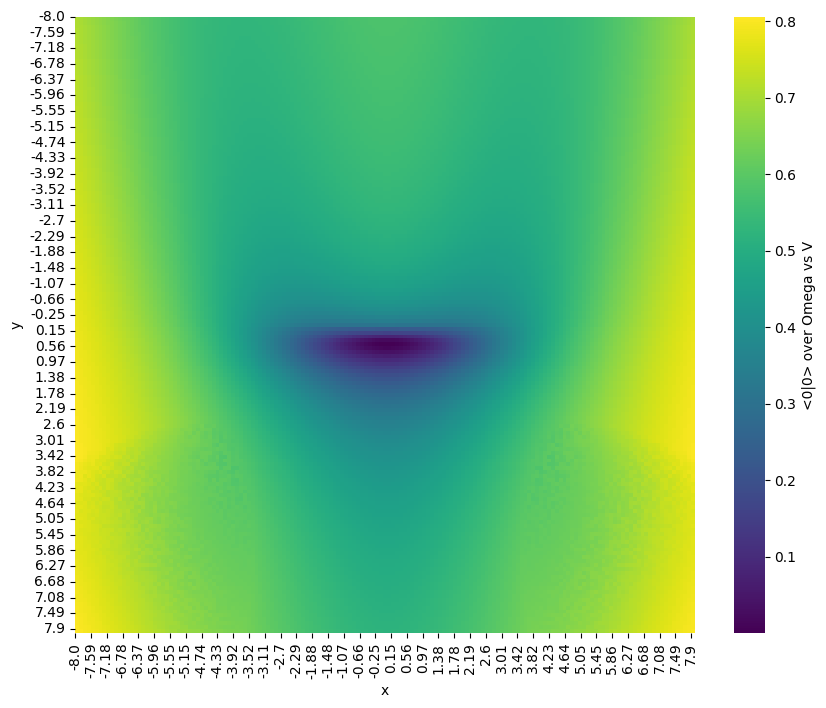

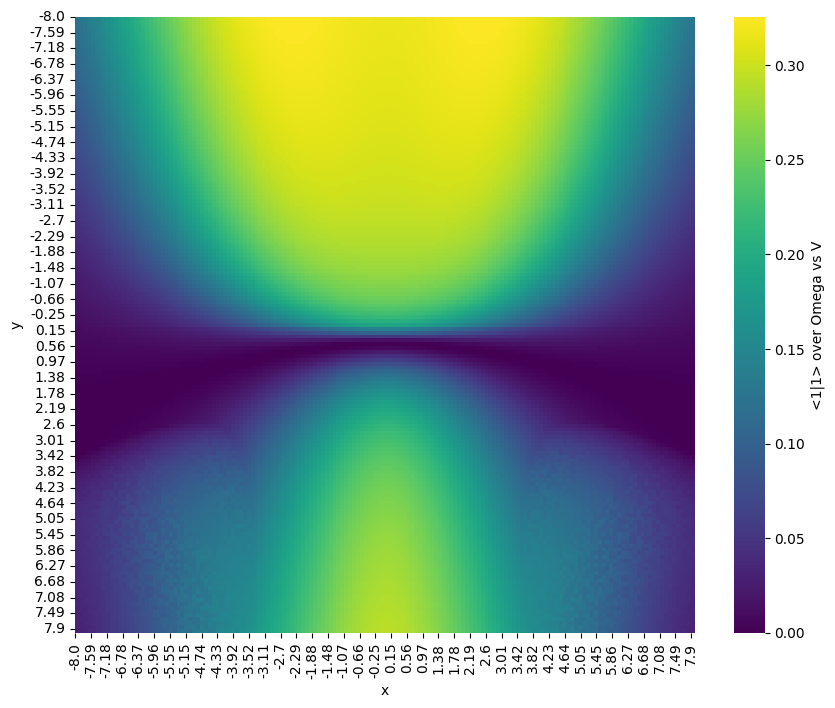

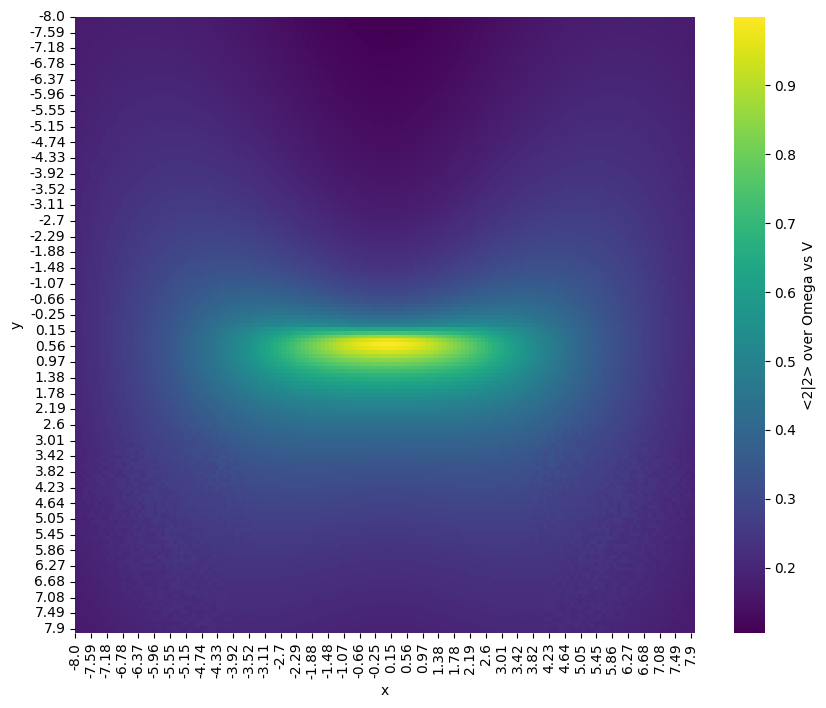

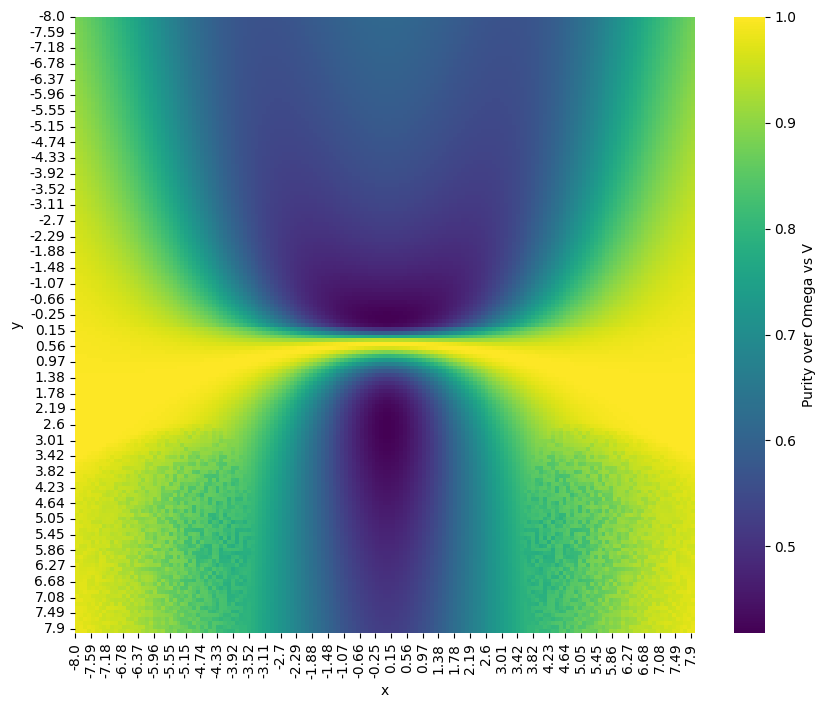

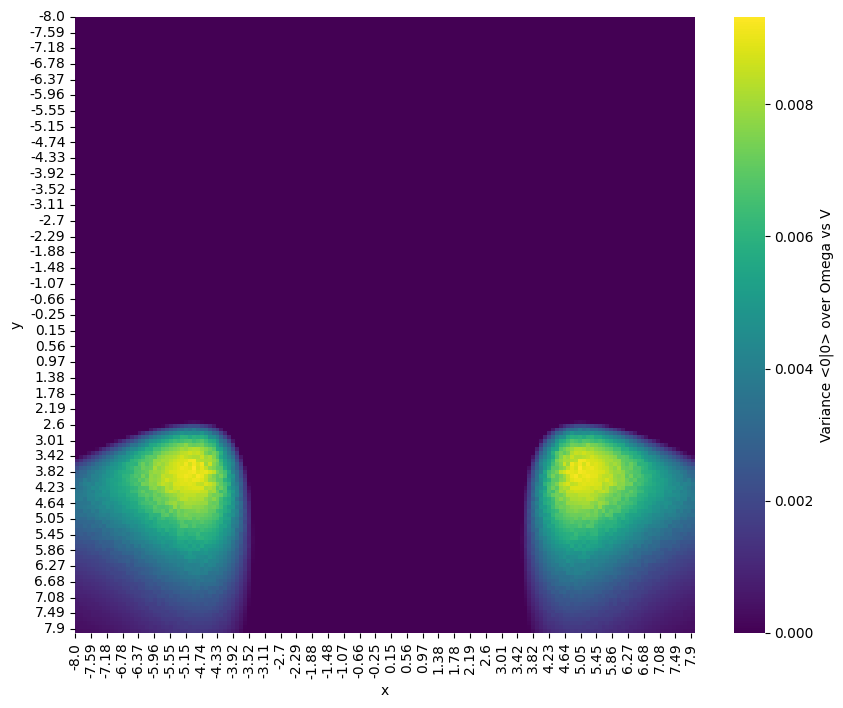

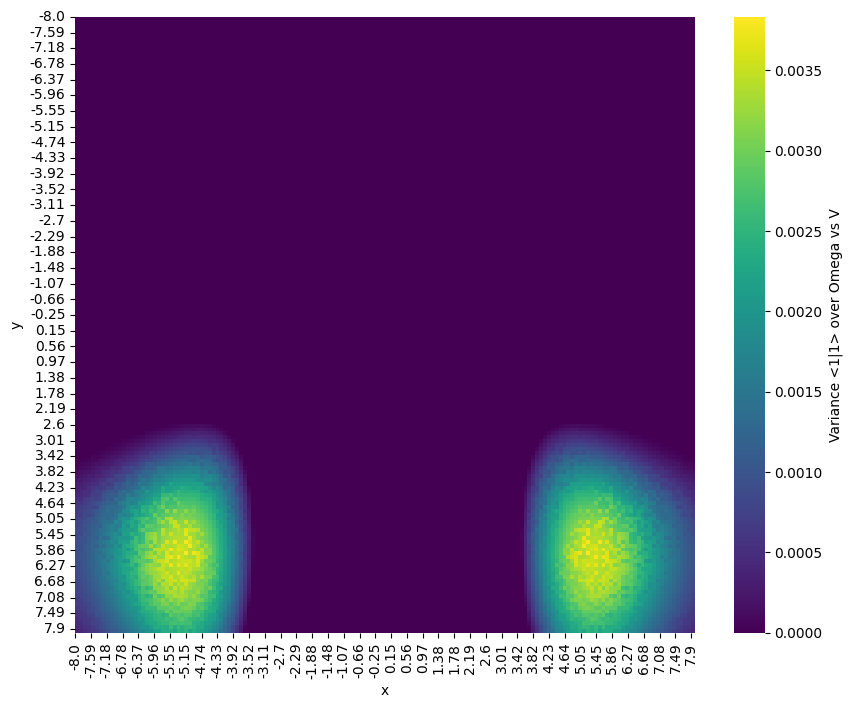

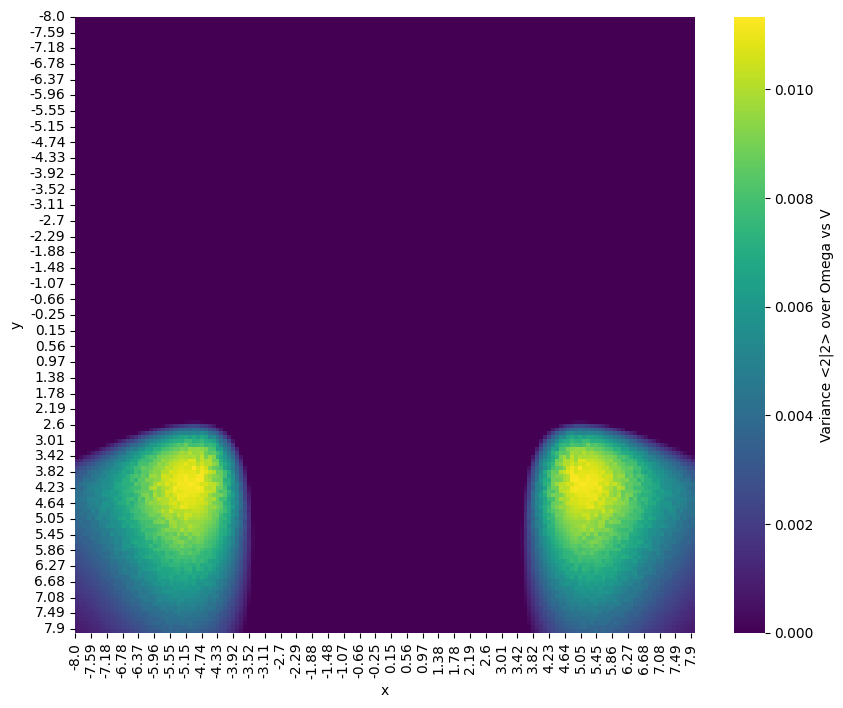

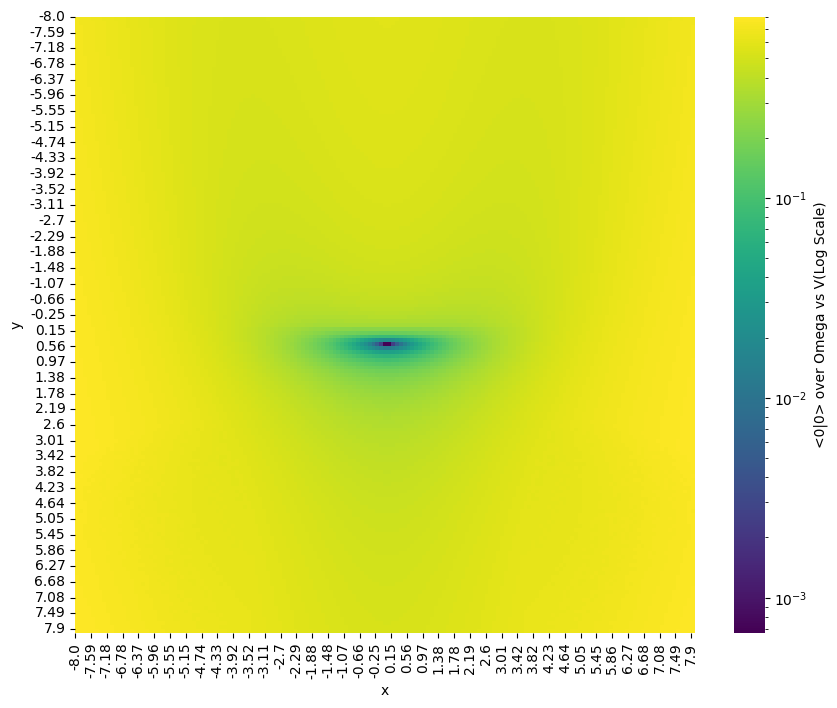

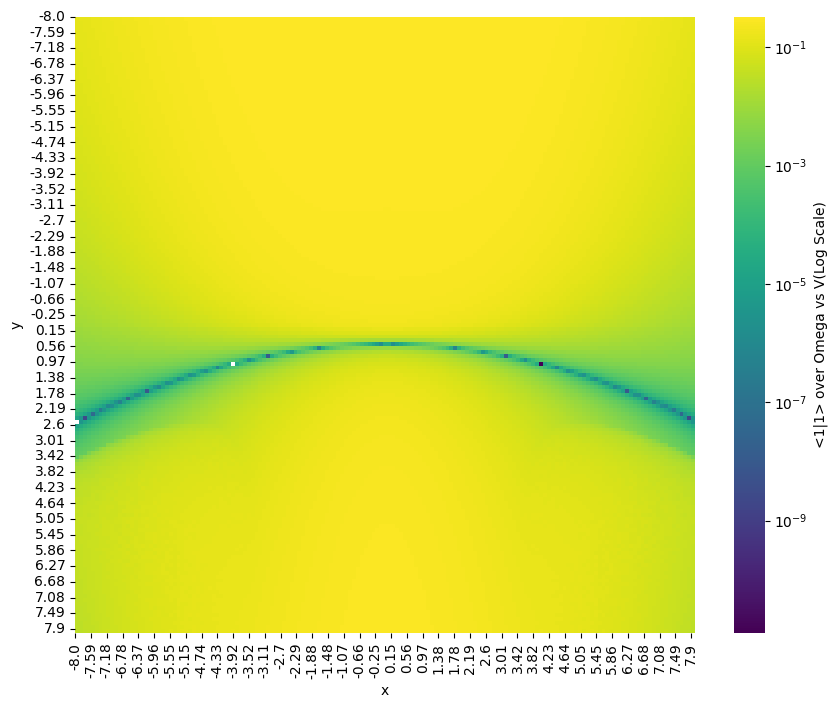

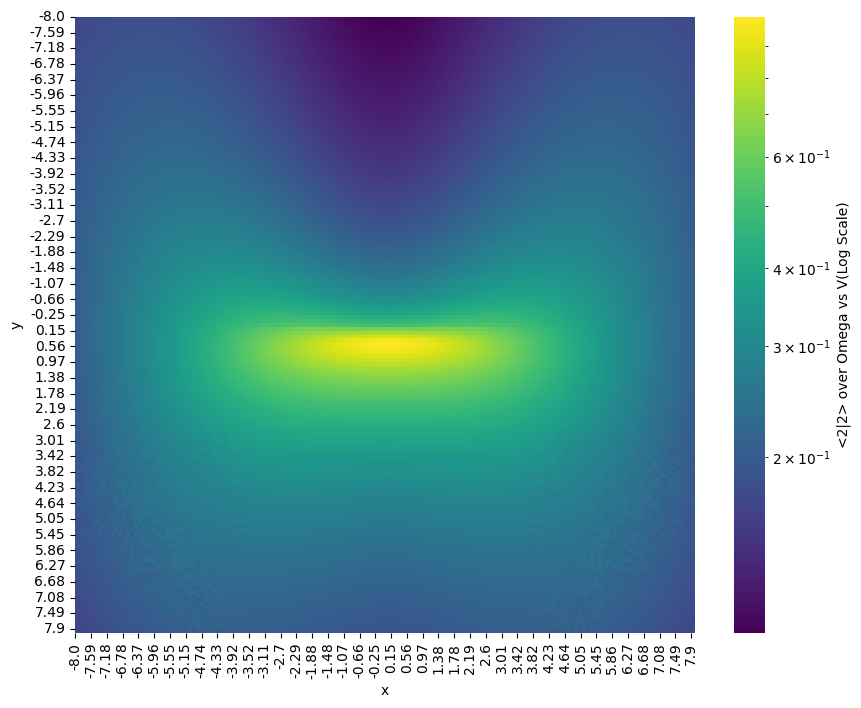

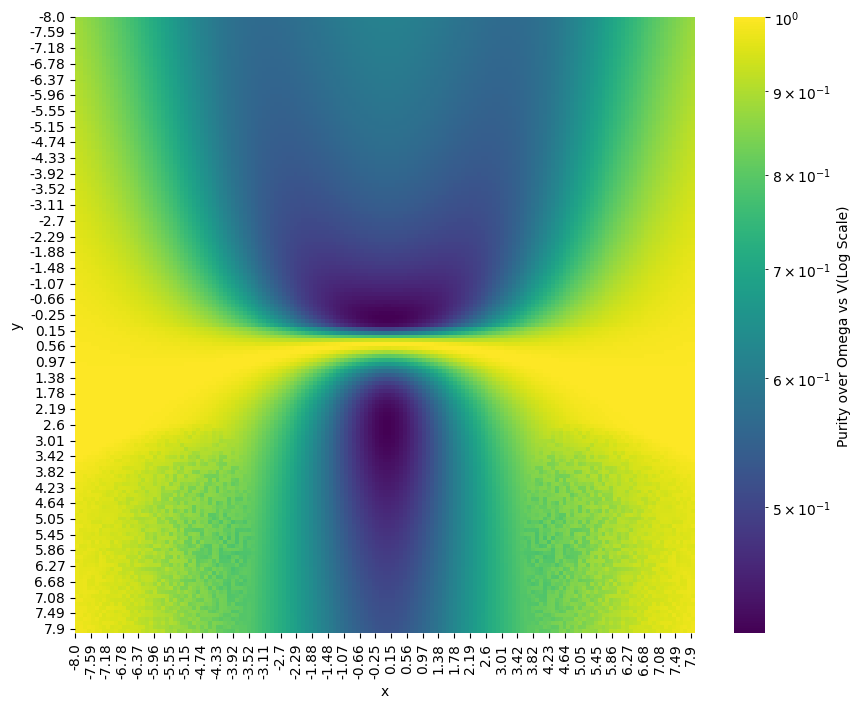

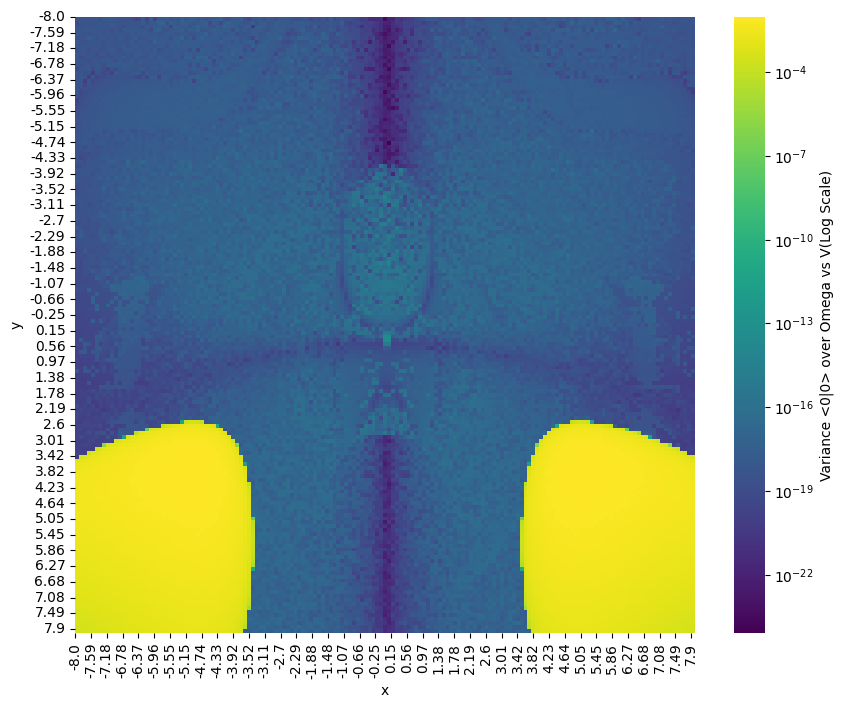

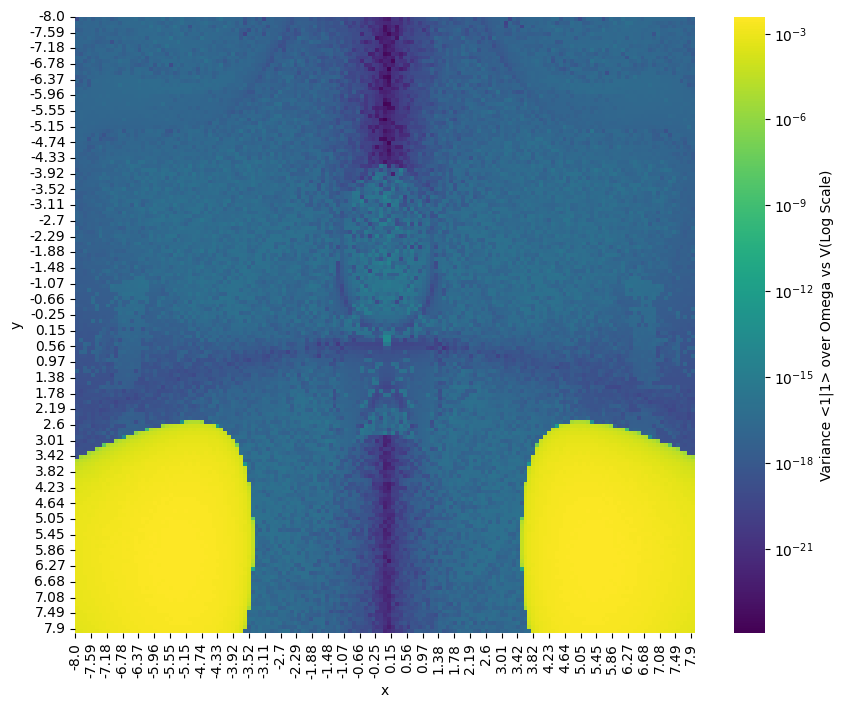

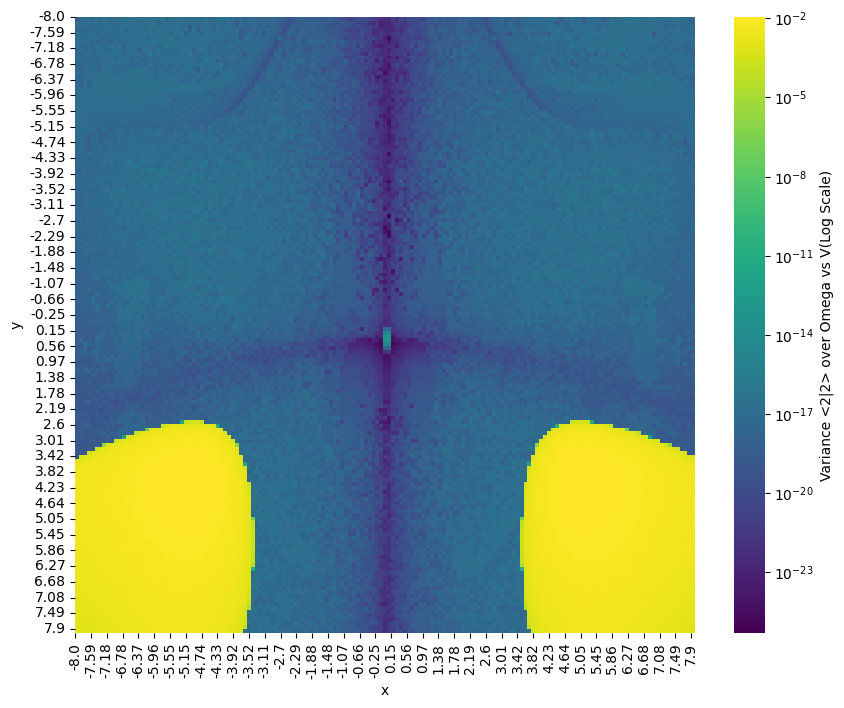

In [28]:
#omega plts
# Plot V over Omega
create_heatmap(Omega, V_vals, psi_00_all, '<0|0> over Omega vs V')
create_heatmap(Omega, V_vals, psi_11_all, '<1|1> over Omega vs V')
create_heatmap(Omega, V_vals, psi_22_all, '<2|2> over Omega vs V')
create_heatmap(Omega, V_vals, purity, 'Purity over Omega vs V')

# Plot Variances for V over Omega
create_heatmap(Omega, V_vals, variances[:, 0], 'Variance <0|0> over Omega vs V')
create_heatmap(Omega, V_vals, variances[:, 1], 'Variance <1|1> over Omega vs V')
create_heatmap(Omega, V_vals, variances[:, 2], 'Variance <2|2> over Omega vs V')
##########################################################################################################
#log sclaed omega
#Plot V over Omega
create_heatmap(Omega, V_vals, psi_00_all, '<0|0> over Omega vs V(Log Scale)', log_scale=True)
create_heatmap(Omega, V_vals, psi_11_all, '<1|1> over Omega vs V(Log Scale)', log_scale=True)
create_heatmap(Omega, V_vals, psi_22_all, '<2|2> over Omega vs V(Log Scale)', log_scale=True)
create_heatmap(Omega, V_vals, purity, 'Purity over Omega vs V(Log Scale)', log_scale=True)

# Plot Variances for V over Omega
create_heatmap(Omega, V_vals, variances[:, 0], 'Variance <0|0> over Omega vs V(Log Scale)', log_scale=True)
create_heatmap(Omega, V_vals, variances[:, 1], 'Variance <1|1> over Omega vs V(Log Scale)', log_scale=True)
create_heatmap(Omega, V_vals, variances[:, 2], 'Variance <2|2> over Omega vs V(Log Scale)', log_scale=True)
###########################################################################################################
#eta plts

# # # Plot V over Eta
# create_heatmap(eta, V_vals, psi_00_all, '<0|0> over Eta vs V')
# create_heatmap(eta, V_vals, psi_11_all, '<1|1> over Eta vs V')
# create_heatmap(eta, V_vals, psi_22_all, '<2|2> over Eta vs V')
# #create_heatmap(eta, V_vals, purity, 'Purity over Eta vs V', Vline=True)
# create_heatmap(eta, V_vals, purity, 'Purity over Eta vs V')
# # Plot Variances for V over Eta

# create_heatmap(eta, V_vals, variances[:, 0]+variances[:, 1]+variances[:, 2], 'Sum over Variances over Eta vs V')

# create_heatmap(eta, V_vals, variances[:, 0], 'Variance <1|1> over Eta vs V')
# create_heatmap(eta, V_vals, variances[:, 1], 'Variance <1|1> over Eta vs V')
# create_heatmap(eta, V_vals, variances[:, 2], 'Variance <2|2> over Eta vs V')

# ##########################################################################################################
# #log sclaed eta

# #Plot V over Eta
# create_heatmap(eta, V_vals, psi_00_all, '<0|0> over Eta vs V (Log Scale)', log_scale=True)
# create_heatmap(eta, V_vals, psi_11_all, '<1|1> over Eta vs V (Log Scale)', log_scale=True)
# create_heatmap(eta, V_vals, psi_22_all, '<2|2> over Eta vs V (Log Scale)', log_scale=True)
# #create_heatmap(eta, V_vals, purity, 'Purity over Eta vs V (Log Scale)', Vline=True)
# create_heatmap(eta, V_vals, purity, 'Purity over Eta vs V (Log Scale)')
# # Plot Variances for V over Eta
# create_heatmap(eta, V_vals, variances[:, 0], 'Variance <0|0> over Eta vs V (Log Scale)', log_scale=True)
# create_heatmap(eta, V_vals, variances[:, 1], 'Variance <1|1> over Eta vs V (Log Scale)', log_scale=True)
# create_heatmap(eta, V_vals, variances[:, 2], 'Variance <2|2> over Eta vs V (Log Scale)', log_scale=True)



Initialisierung linearisierung

In [29]:

psi01=df_filtered['<0|1>'].to_numpy()
psi02=df_filtered['<1|2>'].to_numpy()
psi12=df_filtered['<1|2>'].to_numpy()
# Extrahiere alle Parameter aus den 'additional params'
kappa = kappa[0]
gamma = gamma[0]
Gamma = Gamma[0]
Omega = np.array([params[3] for params in values])
delta_1 = delta_1[0]
delta_2 = delta_2[0]
eta = eta[0]
V_vals = np.array([params[7] for params in values])


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funktion zur Erstellung der Matrix M
def create_matrix_M(kappa, gamma, Gamma, Omega, Delta_1, Delta_2, V, psi00, psi01, psi10, psi11, psi20, psi21, psi02, psi12, psi22):
    g_0 = 1  # Setze g_0 auf einen Wert, den du benötigst
    a = 1    # Setze a auf einen Wert, den du benötigst
    a_dagger = np.conj(a)
    return np.array([
        [-kappa / 2, 0, 0, 0, 0, 0, -1j * gamma * g_0, 0, 0, 0, 0],
        [0, -kappa / 2, 0, 0, 0, 1j * gamma * g_0, 0, 0, 0, 0, 0],
        [1j * gamma * g_0 * psi10, -1j * gamma * g_0 * psi01, 0, Gamma, 0, 1j * g_0 * gamma * a, -1j * g_0 * gamma * a_dagger, 0, 0, 0, 0],
        [-1j * gamma * g_0 * psi10, 1j * gamma * g_0 * psi01, 0, -Gamma, 0, -1j * gamma * g_0 * a, 1j * gamma * g_0 * a_dagger, 1j * Omega / 2, -1j * Omega / 2, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, -1j * Omega / 2, 1j * Omega / 2, 0, 0],
        [0, -1j * gamma * g_0 * (psi11 - psi00), 1j * gamma * g_0 * a_dagger, -1j * gamma * g_0 * a_dagger, 0, -Gamma / 2 + 1j * Delta_1, 0, 0, 0, 1j * Omega / 2, 0],
        [1j * gamma * g_0 * (psi11 - psi00), 0, -1j * gamma * g_0 * a, 1j * gamma * g_0 * a, 0, 0, -Gamma / 2 - 1j * Delta_1, 0, 0, 0, -1j * Omega / 2],
        [-1j * gamma * g_0 * psi20, 0, 0, 1j * Omega / 2, 1j * (2 * V * psi21 - Omega / 2), 0, 0, -Gamma / 2 + 1j * (Delta_2 - Delta_1 + 2 * V * psi22), 0, -1j * gamma * g_0 * a, 0],
        [0, 1j * gamma * g_0 * psi02, 0, -1j * Omega / 2, -2j * V * psi12 + 1j * Omega / 2, 0, 0, 0, -Gamma / 2 + 1j * (Delta_1 - Delta_2 - 2 * V * psi22), 0, 1j * gamma * g_0 * a_dagger],
        [0, -1j * gamma * g_0 * psi21, 0, 0, 2j * V * psi20, 1j * Omega / 2, 0, -1j * gamma * g_0 * a_dagger, 0, 1j * (Delta_2 + 2 * V * psi22), 0],
        [1j * g_0 * gamma * psi12, 0, 0, 0, -2j * V * psi02, 0, -1j * Omega / 2, 0, 1j * gamma * g_0 * a, 0, -1j * (Delta_2 + 2 * V * psi22)]
    ])

# Lege eine Liste an, um die Anzahl der instabilen Eigenwerte zu speichern
unstable_eigenvalues_count = []

# Iteriere über alle V-Werte
for V in np.unique(V_vals):
    # Filtere die Daten für den aktuellen V-Wert
    df_V_filtered = df_filtered[df_filtered['additional params'].apply(lambda x: x[7] == V)]

    # Iteriere über alle Omega-Werte innerhalb der gefilterten Daten
    for Omega in np.unique(df_V_filtered['additional params'].apply(lambda x: x[3])):
        # Filtere die Daten für den aktuellen Omega-Wert
        df_Omega_filtered = df_V_filtered[df_V_filtered['additional params'].apply(lambda x: x[3] == Omega)]

        # Weise die entsprechenden psi-Werte zu
        psi00 = df_Omega_filtered['<0|0>'].to_numpy()
        psi11 = df_Omega_filtered['<1|1>'].to_numpy()
        psi22 = df_Omega_filtered['<2|2>'].to_numpy()
        psi01 = df_Omega_filtered['<0|1>'].to_numpy()
        psi02 = df_Omega_filtered['<0|2>'].to_numpy()
        psi10 = df_Omega_filtered['<1|0>'].to_numpy()
        psi20 = df_Omega_filtered['<2|0>'].to_numpy()
        psi21 = df_Omega_filtered['<2|1>'].to_numpy()
        psi12 = df_Omega_filtered['<1|2>'].to_numpy()

        # Extrahiere die anderen Parameter
        kappa = df_Omega_filtered['additional params'].apply(lambda x: x[0]).values[0]
        gamma = df_Omega_filtered['additional params'].apply(lambda x: x[1]).values[0]
        Gamma = df_Omega_filtered['additional params'].apply(lambda x: x[2]).values[0]
        Delta_1 = df_Omega_filtered['additional params'].apply(lambda x: x[4]).values[0]
        Delta_2 = df_Omega_filtered['additional params'].apply(lambda x: x[5]).values[0]

        # Erstelle die Matrix M
        M = create_matrix_M(kappa, gamma, Gamma, Omega, Delta_1, Delta_2, V, psi00, psi01, psi10, psi11, psi20, psi21, psi02, psi12, psi22)

        # Berechne die Eigenwerte der Matrix M
        eigenvalues = np.linalg.eigvals(M)

        # Zähle die Anzahl der instabilen Eigenwerte (größer als 1e-6)
        unstable_count = np.sum(eigenvalues > 1e-6)
        
        # Speichere das Ergebnis für diesen V- und Omega-Wert
        unstable_eigenvalues_count.append((V, Omega, unstable_count))

# Konvertiere die Ergebnisse in ein DataFrame
results_df = pd.DataFrame(unstable_eigenvalues_count, columns=['V', 'Omega', 'Unstable Eigenvalues'])

# Erstelle eine Pivot-Tabelle für die Heatmap
heatmap_data = results_df.pivot('V', 'Omega', 'Unstable Eigenvalues')

# Erstelle die Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='viridis')
plt.title('Heatmap of Unstable Eigenvalues Count')
plt.xlabel('Omega')
plt.ylabel('V')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (11, 11) + inhomogeneous part.

Hier alles für limit cycle plot 3d


In [57]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# System parameters
kappa = 1
gamma = 1
Gamma = 1
delta_1 = 1
delta_2 = 1
Omega = 5  # Set Omega to 5
eta = 1
g_0 = 1
V = -5.5  # Fixed value of V

T = 10000  # Time
T_auflösung = 50 * T  # This gives how many data points are between 0 and T, or in other words, the resolution

# Initial density matrix with m_00 = 1, all else = 0
m_00 = 1 + 0j
m_11 = 0 + 0j
m_22 = 0 + 0j

# Initial conditions based on the density matrix
a0 = 0 + 0j
a_dagger_0 = 0 + 0j
psi00 = m_00
psi01 = 0 + 0j
psi02 = 0 + 0j
psi10 = 0 + 0j
psi11 = m_11
psi12 = 0 + 0j
psi20 = 0 + 0j
psi21 = 0 + 0j
psi22 = m_22

# Differential equation system
def dydt(t, y):
    a, a_dagger, ket00, ket01, ket10, ket11, ket22, ket21, ket12, ket20, ket02 = y
    
    da_dt = -kappa/2 * a - 1j * (gamma * ket01) + eta
    da_dagger_dt = np.conj(da_dt)
    dket00_dt = +Gamma * ket11 + 1j * gamma * (ket10 * a - ket01 * a_dagger)
    dket01_dt = -Gamma/2 * ket01 + 1j * (-delta_1 * ket01 + gamma * (ket11 * a - ket00 * a) - Omega/2 * ket02)
    dket10_dt = np.conj(dket01_dt)
    dket11_dt = -Gamma * ket11 + 1j * gamma * (ket01 * a_dagger - ket10 * a) + 1j * Omega/2 * (ket21 - ket12)
    dket22_dt = 1j * Omega / 2 * (ket12 - ket21)
    dket21_dt = -Gamma/2 * ket21 + 1j * (delta_2 * ket21 - delta_1 * ket21 - gamma * ket20 * a + Omega/2 * (ket11 - ket22) + 2 * V * ket21 * ket22)
    dket12_dt = np.conj(dket21_dt)
    dket02_dt = 1j * (-delta_2 * ket02 - Omega/2 * ket01 - 2 * V * ket02 * ket22 + gamma * ket12 * a)
    dket20_dt = np.conj(dket02_dt)
    
    return [da_dt, da_dagger_dt, dket00_dt, dket01_dt, dket10_dt, dket11_dt, dket22_dt, dket21_dt, dket12_dt, dket20_dt, dket02_dt]

startcond = [a0, a_dagger_0, psi00, psi01, psi02, psi10, psi11, psi12, psi20, psi21, psi22]
t_eval = np.linspace(0, T, T_auflösung)
y0 = [a0, a_dagger_0, psi00, psi01, psi10, psi11, psi22, psi21, psi12, psi20, psi02]

sol = solve_ivp(dydt, (0, T), y0, t_eval=t_eval, method='DOP853', rtol=1e-8, atol=1e-10)



code für 3d plot

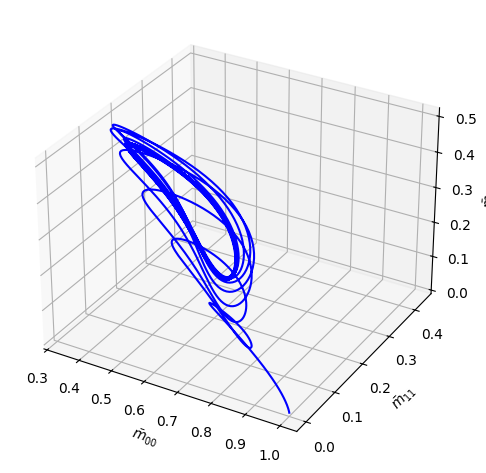

In [63]:
psi00_results = np.real(sol.y[2])
psi11_results = np.real(sol.y[5])
psi22_results = np.real(sol.y[6])

# Plot results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line with full opacity
ax.plot3D(psi00_results, psi11_results, psi22_results, 'b-', alpha=1.0)

# Calculate and plot the x marker at the specified location
m_00_marker = delta_2 / (2 * V) + 1
m_22_marker = -delta_2 / (2 * V)
#ax.scatter(m_00_marker, 0, m_22_marker, color='red', marker='x', s=100)

# Label axes with \bar{m_{xx}}
ax.set_xlabel(r'$\bar{m}_{00}$')
ax.set_ylabel(r'$\bar{m}_{11}$')
ax.set_zlabel(r'$\bar{m}_{22}$')

# Show plot
plt.tight_layout()
# Save plot to a specific location
save_path = "/home/paul/Documents/atm/plots/limit_cycle.png"  # Replace with your desired path and file name

#plt.savefig(save_path)

#plt.show()


code für 2d plots

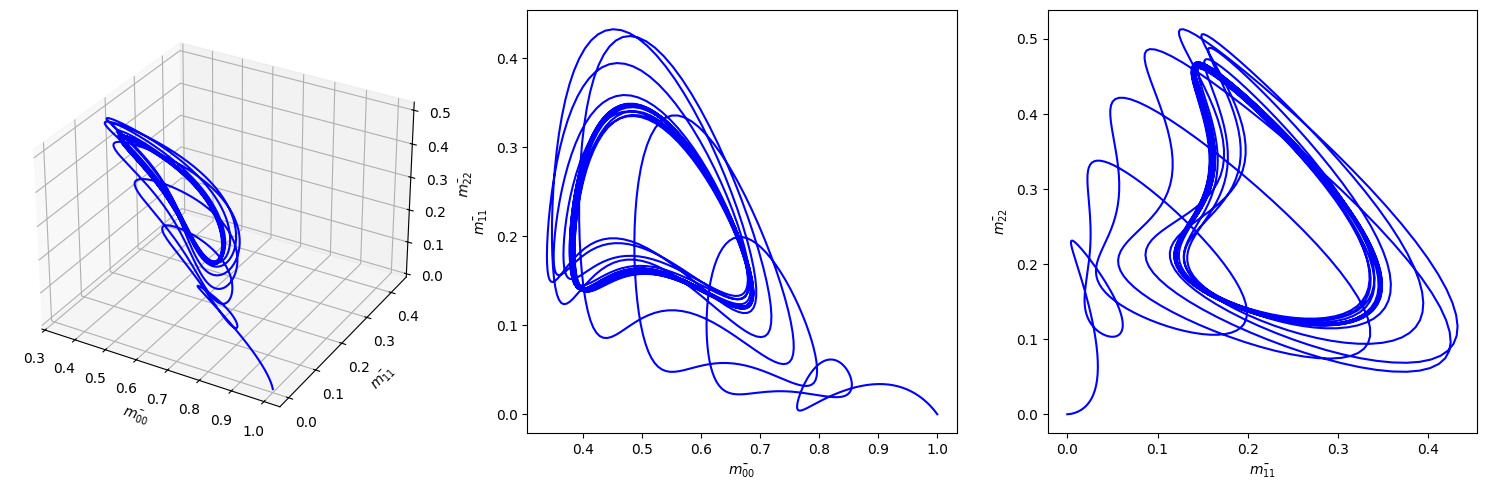

In [64]:

psi00_results = np.real(sol.y[2])
psi11_results = np.real(sol.y[5])
psi22_results = np.real(sol.y[6])

# Create a 3D plot
fig = plt.figure(figsize=(15, 5))

# Subplot 1: 3D plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot3D(psi00_results, psi11_results, psi22_results, 'b-', alpha=1.0)
#ax1.scatter(delta_2 / (2 * V) + 1, 0, -delta_2 / (2 * V), color='red', marker='x', s=100)
ax1.set_xlabel(r'$\bar{m_{00}}$')
ax1.set_ylabel(r'$\bar{m_{11}}$')
ax1.set_zlabel(r'$\bar{m_{22}}$')

# Subplot 2: 2D m00/m11 view
ax2 = fig.add_subplot(132)
ax2.plot(psi00_results, psi11_results, 'b-', alpha=1.0)
#ax2.scatter(delta_2 / (2 * V) + 1, 0, color='red', marker='x', s=100)
ax2.set_xlabel(r'$\bar{m_{00}}$')
ax2.set_ylabel(r'$\bar{m_{11}}$')

# Subplot 3: 2D m11/m22 view
ax3 = fig.add_subplot(133)
ax3.plot(psi11_results, psi22_results, 'b-', alpha=1.0)
#ax3.scatter(0, -delta_2 / (2 * V), color='red', marker='x', s=100)
ax3.set_xlabel(r'$\bar{m_{11}}$')
ax3.set_ylabel(r'$\bar{m_{22}}$')

# Save plot to a specific location
save_path = "/home/paul/Documents/atm/plots/limit_cycle.png"  # Replace with your desired path and file name
plt.savefig(save_path)

# Show plot
plt.tight_layout()
plt.show()

Hier code für slizing mit eingefügter pure state linie

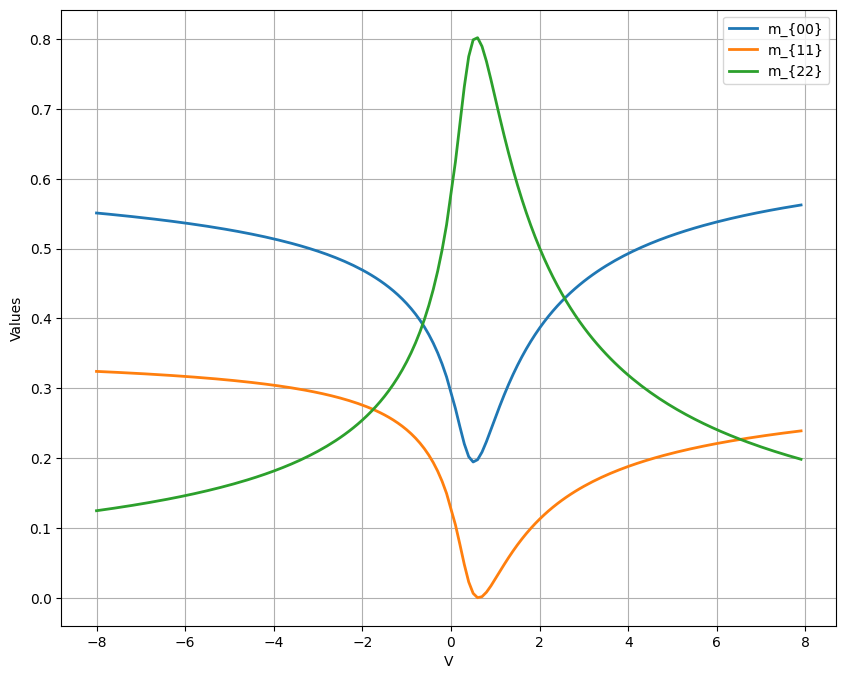

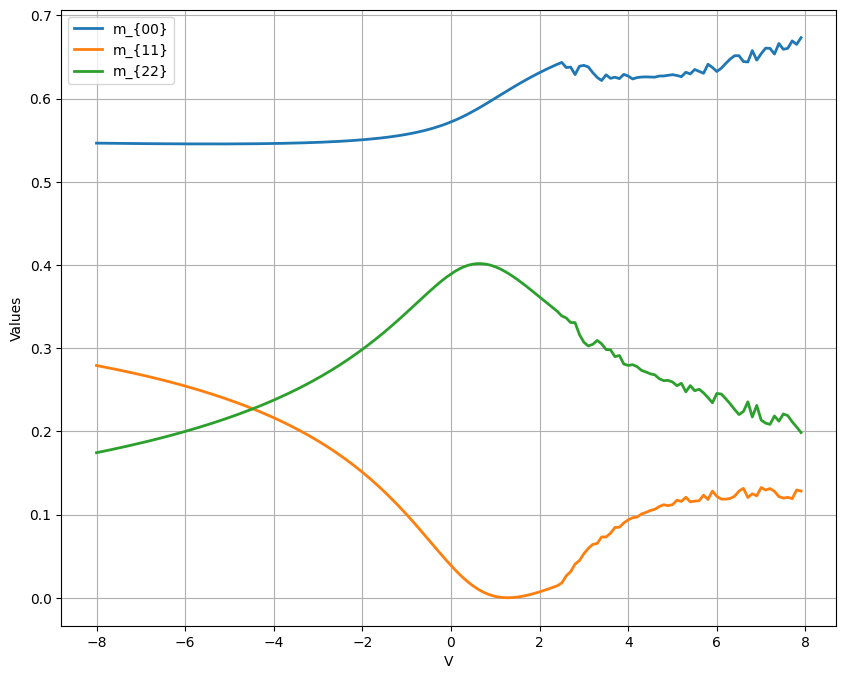

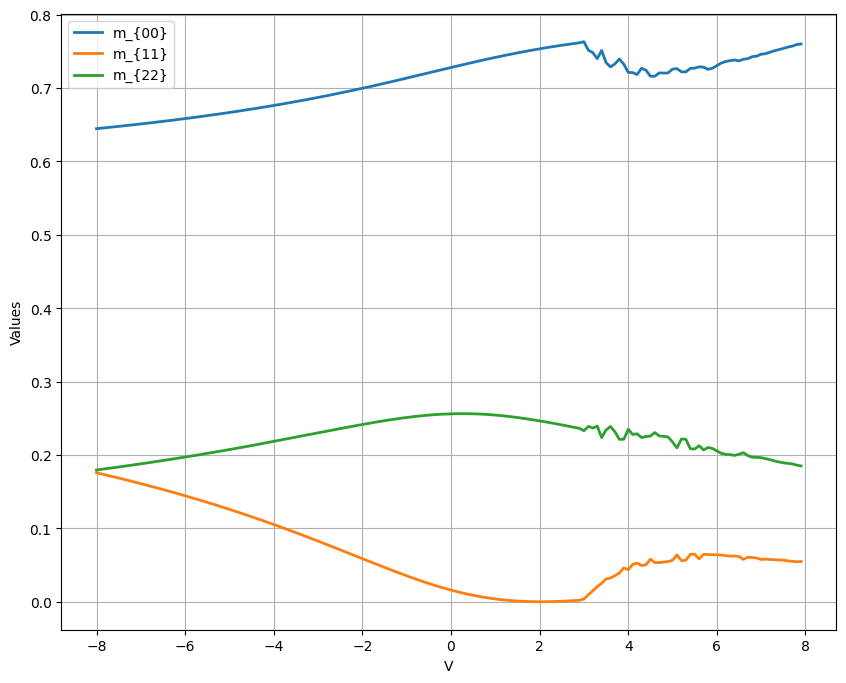

[-1 -1 -1 ... -1 -1 -1] [-1 -1 -1 ... -1 -1 -1]


In [117]:
# Wähle die zu plottenden Datenpunkte aus und filtere V < 900
df_filtered = df_full[df_full['V'] < 900]

# Extrahiere die relevanten Daten
psi_00_all = df_filtered['<0|0>'].to_numpy()
psi_11_all = df_filtered['<1|1>'].to_numpy()
psi_22_all = df_filtered['<2|2>'].to_numpy()
purity = df_filtered['purity'].to_numpy()
values = df_filtered['additional params'].to_numpy()
variances = df_filtered[['var_<0|0>', 'var_<1|1>', 'var_<2|2>']].to_numpy()

# Extrahiere alle Parameter aus den 'additional params'
kappa = np.array([params[0] for params in values])
gamma = np.array([params[1] for params in values])
Gamma = np.array([params[2] for params in values])
Omega = np.array([params[3] for params in values])
delta_1 = np.array([params[4] for params in values])
delta_2 = np.array([params[5] for params in values])
eta = np.array([params[6] for params in values])

# Definiere eine Toleranz für den Vergleich von float-Werten
epsilon = 1e-5

# Ausgewählte Omega-Werte
selected_Omegas = [2,5,7]

def get_real_value(value):
    if isinstance(value, sp.Expr):
        return float(sp.re(value))
    return float(np.real(value))

# Plot Purity und psi_00, psi_11, psi_22 über V für alle ausgewählten Omega-Werte
for fixed_Omega in selected_Omegas:
    indices_fixed_Omega = np.where(np.abs(Omega - fixed_Omega) < epsilon)[0]

    if indices_fixed_Omega.size > 0:
        V_fixed_Omega = df_filtered['V'].to_numpy()[indices_fixed_Omega]
        psi_00_fixed_Omega = np.array([get_real_value(val) for val in psi_00_all[indices_fixed_Omega]])
        psi_11_fixed_Omega = np.array([get_real_value(val) for val in psi_11_all[indices_fixed_Omega]])
        psi_22_fixed_Omega = np.array([get_real_value(val) for val in psi_22_all[indices_fixed_Omega]])
        purity_fixed_Omega = np.array([get_real_value(val) for val in purity[indices_fixed_Omega]])
        
        # Berechne die Summe der Varianzen für die gegebenen Indizes
        variance_sums = np.sum(variances[indices_fixed_Omega], axis=1)

        # Sortiere die Daten nach V in absteigender Reihenfolge
        sorted_indices = np.argsort(V_fixed_Omega)[::-1]
        V_fixed_Omega = V_fixed_Omega[sorted_indices]
        psi_00_fixed_Omega = psi_00_fixed_Omega[sorted_indices]
        psi_11_fixed_Omega = psi_11_fixed_Omega[sorted_indices]
        psi_22_fixed_Omega = psi_22_fixed_Omega[sorted_indices]
        purity_fixed_Omega = purity_fixed_Omega[sorted_indices]
        variance_sums = variance_sums[sorted_indices]

        plt.figure(figsize=(10, 8))
        plt.plot(V_fixed_Omega, psi_00_fixed_Omega, label='m_{00}', linewidth=2)
        plt.plot(V_fixed_Omega, psi_11_fixed_Omega, label='m_{11}', linewidth=2)
        plt.plot(V_fixed_Omega, psi_22_fixed_Omega, label='m_{22}', linewidth=2)
        #plt.plot(V_fixed_Omega, purity_fixed_Omega, label='Purity', linewidth=2)
        #plt.plot(V_fixed_Omega, variance_sums, label='Sum of Variances', linewidth=2)
        plt.xlabel('V')
        plt.ylabel('Values')
        #plt.title(f'Psi Values over V for Omega = {fixed_Omega}')
        plt.legend()
        plt.grid(True)
        
        # Speichere den Plot als Bild vor dem Aufruf von plt.show()
        plot_filename = f"slizes_{fixed_Omega}.png"
        output_directory = "/home/paul/Documents/atm/plots"
        plt.savefig(os.path.join(output_directory, plot_filename))
        
        plt.show()
    else:
        print(f"No data available for Omega = {fixed_Omega}")
print(delta_1,delta_2)

Verfügbare Omega-Werte: [-8.  -7.9 -7.8 -7.7 -7.6 -7.5 -7.4 -7.3 -7.2 -7.1 -7.  -6.9 -6.8 -6.7
 -6.6 -6.5 -6.4 -6.3 -6.2 -6.1 -6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3
 -5.2 -5.1 -5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9
 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5
 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1
 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8
  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2
  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6
  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.
  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


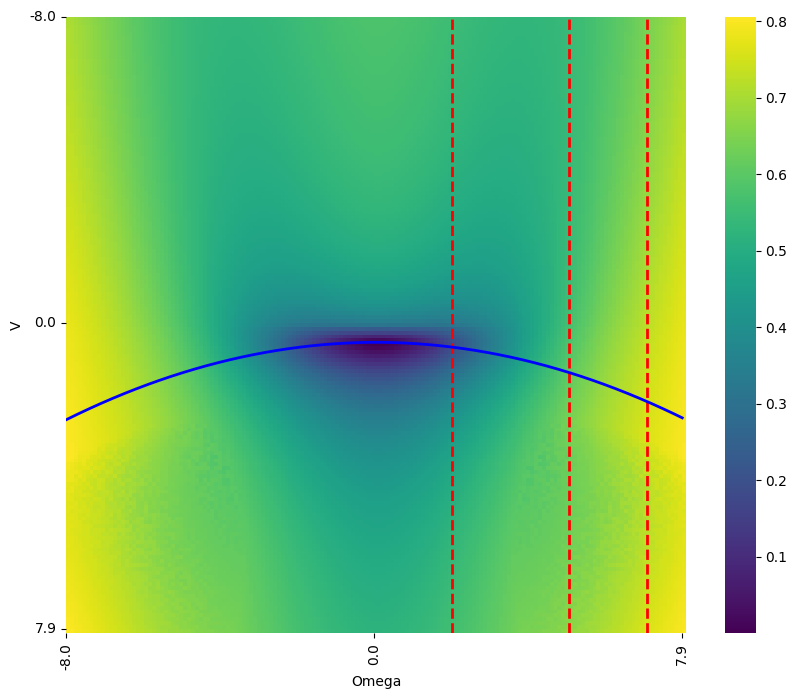

In [115]:
# Wähle die zu plottenden Datenpunkte aus und filtere V < 9
df_filtered = df_full[df_full['V'] < 900]

# Extrahiere die relevanten Daten
psi_00_all = df_filtered['<0|0>'].to_numpy()
psi_11_all = df_filtered['<1|1>'].to_numpy()
psi_22_all = df_filtered['<2|2>'].to_numpy()
purity = df_filtered['purity'].to_numpy()
values = df_filtered['additional params'].to_numpy()
variances = df_filtered[['var_<0|0>', 'var_<1|1>', 'var_<2|2>']].to_numpy()

# Extrahiere alle Parameter aus den 'additional params'
kappa = np.array([params[0] for params in values])
gamma = np.array([params[1] for params in values])
Gamma = np.array([params[2] for params in values])
Omega = np.array([params[3] for params in values])
delta_1 = np.array([params[4] for params in values])
delta_2 = np.array([params[5] for params in values])
eta = np.array([params[6] for params in values])

# Extrahiere den ersten Wert aus den Arrays für die Berechnungen
Delta_2 = delta_2[0]  # Erster Wert von delta_2
kappa_value = kappa[0]  # Erster Wert von kappa
gamma_value = gamma[0]  # Erster Wert von gamma
g_value = 1.0  # Beispielwert für g, ggf. anpassen
eta_value = eta[0]  # Erster Wert von eta


#Einzigartige Omega-Werte bestimmen
unique_Omega_values = np.unique(Omega)
print("Verfügbare Omega-Werte:", unique_Omega_values)


def get_real_value(value):
    if isinstance(value, sp.Expr):
        return float(sp.re(value))
    return float(np.real(value))

def create_heatmap_with_lines(x_var, y_var, z_var, z_title, log_scale=False, line_positions=None, blue_line=True):
    x_unique = np.unique(x_var)
    y_unique = np.unique(y_var)
    
    heatmap_data = np.full((len(y_unique), len(x_unique)), np.nan)
    
    for i, y in enumerate(y_unique):
        for j, x in enumerate(x_unique):
            indices = np.where((y_var == y) & (x_var == x))[0]
            if indices.size > 0:
                heatmap_data[i, j] = get_real_value(z_var[indices][0])
    
    plot_heatmap_with_lines(heatmap_data, xlabel='Omega', ylabel='V', x_unique=x_unique, y_unique=y_unique, log_scale=log_scale, line_positions=line_positions, blue_line=blue_line)

def plot_heatmap_with_lines(data, xlabel='Omega', ylabel='V', cmap='viridis', x_unique=None, y_unique=None, log_scale=False, line_positions=None, blue_line=True):
    plt.figure(figsize=(10, 8))
    if log_scale:
        ax = sns.heatmap(data, cmap=cmap, cbar_kws={'label': ''}, norm=LogNorm())
    else:
        ax = sns.heatmap(data, cmap=cmap, cbar_kws={'label': ''})
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Set custom ticks: lowest, highest, and zero value
    if x_unique is not None:
        x_ticks = [x_unique.min(), 0, x_unique.max()]
        ax.set_xticks(np.linspace(0, len(x_unique) - 1, len(x_ticks)))
        ax.set_xticklabels(np.round(x_ticks, 2))
        
    if y_unique is not None:
        y_ticks = [y_unique.min(), 0, y_unique.max()]
        ax.set_yticks(np.linspace(0, len(y_unique) - 1, len(y_ticks)))
        ax.set_yticklabels(np.round(y_ticks, 2))

    # Draw vertical lines at the specified positions
    if line_positions:
        for line_pos in line_positions:
            x_pos = np.argmin(np.abs(x_unique - line_pos))
            ax.axvline(x=x_pos, color='red', linestyle='--', linewidth=2)

    # Calculate and draw the blue line
    if blue_line and x_unique is not None:
        V_blue_line = -Delta_2 / 2 * ((x_unique * kappa_value / (4 * eta_value * gamma_value * g_value)) ** 2 + 1)
        blue_line_positions = np.interp(V_blue_line, y_unique, np.arange(len(y_unique)))
        ax.plot(np.arange(len(x_unique)), blue_line_positions, color='blue', linestyle='-', linewidth=2)

    # Speichere den Plot als Bild vor plt.show()
    plot_filename = f"heatmap_sliced.png"
    output_directory = "/home/paul/Documents/atm/plots"
    plt.savefig(os.path.join(output_directory, plot_filename))
    
    plt.show()

# Hier wählst du die Linienpositionen aus
x_var = Omega  # X-Achse der Heatmap, z.B. Omega
y_var = df_filtered['V'].to_numpy()  # Y-Achse der Heatmap, z.B. V
z_var = psi_00_all  # Z-Wert der Heatmap, z.B. psi_00_all

# Linienpositionen für die vertikalen Linien in der Heatmap
line_positions = [2, 5, 7]  # Beispiel-Omega-Werte, die markiert werden sollen

# Erstelle die Heatmap mit der blauen Linie
create_heatmap_with_lines(x_var, y_var, z_var, z_title='', log_scale=False, line_positions=line_positions)
